# Class Workbook

## In class activity

In [2]:
import numpy as np
import pandas as pd
import math
#import statsmodels.api as sm
from plotnine import *
import statsmodels.formula.api as sm


In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize ,
                        poly)

### Ames House Data

In [4]:
ames_raw=pd.read_csv("ames_raw.csv")

Let's revisit the AmesHousing data.  As we did in the previous class, I will split the data into before 2008 and after.  The data up to 2008 will be the training data and after 2008 will be the testing data.

In [5]:
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

* For the regression model fit, use bootstrap to compare the standard error estimates to the model based estimates.


Your code:

In [6]:
#
#
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


dependent_var = 'SalePrice'
independent_vars = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF',  'Year Built']

X_train = ames_raw_2008[independent_vars].fillna(0)  # fillna(0) is a quick and dirty way to handle missing values  
y_train = ames_raw_2008[dependent_var]
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()




model_based_std_errors = model.bse
model_based_std_errors

const            88392.444900
Overall Qual      1198.844535
Gr Liv Area          2.637724
Total Bsmt SF        3.096924
Year Built          46.554062
dtype: float64

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1135.
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:00:49   Log-Likelihood:                -15819.
No. Observations:                1319   AIC:                         3.165e+04
Df Residuals:                    1314   BIC:                         3.167e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.886e+05   8.84e+04     -8.922      0.000   -9.62e+05   -6.15e+05
Overall Qual   2.353e+04   1198.845     19.629      0.000    2.12e+04    2.59e+04
Gr Liv Area      60.6959      2.638     23.011      0.000      55.521      65.871
Total Bsmt SF    30.1646      3.097      9.740      0.000      24.089      36.240
Year Built      357.1992     46.554      7.673      0.000     265.871     448.528
==============================================================================
Omnibus:                      404.371   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26901.233
Skew:                          -0.513   Prob(JB):                         0.00
Kurtosis:                      25.100   Cond. No.                     2.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Your answer:

~~~
Please write your answer in full sentences.

The bootstrap standard errors are very close to the model-based standard errors, indicating consistency in the estimates.

~~~


* Use cross validation  to decide which model has a good predictive accuracy.  Does the result hold true for the prediction of future data?

Your code:

In [9]:
#
#

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Initialize models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet()
}

# Cross-validation settings
k = 5  # Number of folds
scoring = 'neg_mean_squared_error'  # Metric for evaluation

# Perform cross-validation for each model and store the results
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=k, scoring=scoring)
    cv_results[name] = scores.mean()




X_test = ames_raw_2009[independent_vars].fillna(0)  
y_test = ames_raw_2009[dependent_var]
best_model = Ridge()
best_model.fit(X_train, y_train)
# Predicting on test data
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_mse ,cv_results


(1334718540.062045,
 {'Linear Regression': -1706392757.2425964,
  'Ridge Regression': -1706400475.2955577,
  'Lasso Regression': -1706394573.89814,
  'Elastic Net': -1774828402.8209305})

Your answer:

~~~
Please write your answer in full sentences.

This MSE value is lower than the MSE value of the Ridge Regression model.
 This suggests that the Ridge Regression model has good predictive accuracy and the result holds true for the prediction of future data.

~~~


* Using `knn.reg` fit KNN regression model.  Use cross validation to decide which K to use.

Your code:

In [10]:
#
#


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Selecting dependent and independent variables
dependent_var = 'SalePrice'
independent_vars = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', 'Year Built']

# Preparing the training and testing data
X_train = ames_raw_2008[independent_vars].fillna(0)
y_train = ames_raw_2008[dependent_var]
X_test = ames_raw_2009[independent_vars].fillna(0)
y_test = ames_raw_2009[dependent_var]


k_values = range(1, 21)


knn_mse = {}

for k in k_values:
   
    knn_model = KNeighborsRegressor(n_neighbors=k)


    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    knn_mse[k] = scores.mean()

optimal_k = min(knn_mse, key=knn_mse.get)

# Fitting the KNN model with optimal K to the entire training data
optimal_knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
optimal_knn_model.fit(X_train, y_train)


y_pred_knn = optimal_knn_model.predict(X_test)


test_mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"Optimal K value: {optimal_k}")
print(f"Test MSE for KNN with K={optimal_k}: {test_mse_knn}")

Optimal K value: 1
Test MSE for KNN with K=1: 2220664399.7299814


Your answer:

~~~
Please write your answer in full sentences.

While the cross-validation suggested K=1 as the best value, 
the high MSE on the test data suggests that the model is overfitting.
~~~


* Which model performs better on your training data?  Which model performs better in your future prediction?

Your code:

In [11]:
#
#
cv_results

{'Linear Regression': -1706392757.2425964,
 'Ridge Regression': -1706400475.2955577,
 'Lasso Regression': -1706394573.89814,
 'Elastic Net': -1774828402.8209305}

Your answer:

~~~
Please write your answer in full sentences.

ridge regression model performs better on the training data,knn regression model performs better in the future prediction, but it seems to be overfitting.
~~~

## Problem Set

### Bootstrap

We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We first create an array store with values that will subsequently
be overwritten using the function np.empty(). We then repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap
sample.

We will investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time
we record whether or not the fourth observation is contained in the bootstrap sample.

Here is the code to get you going

In [12]:
rng = np.random.default_rng (10)
store = np.empty (10000)
for i in range (10000):
    store[i] = np.sum(rng.choice(100, 100, replace=True) == 4) > 0


np.mean(store)

0.6362

Comment on the results obtained.


Your code:

Your answer:

~~~
Please write your answer in full sentences.

IN 10000 bootstrap samples, the 4th observation was contained in 62.5% of the samples.

~~~

### CV

We will now perform cross-validation on a simulated data set.
(a) Generate a simulated data set as follows:

In [13]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.


Your code:

Your answer:

~~~
Please write your answer in full sentences.

n is the number of observations,n=100
p is the number of predictors, p=1
~~~


(b) Create a scatterplot of X against Y . Comment on what you find.


Your code:

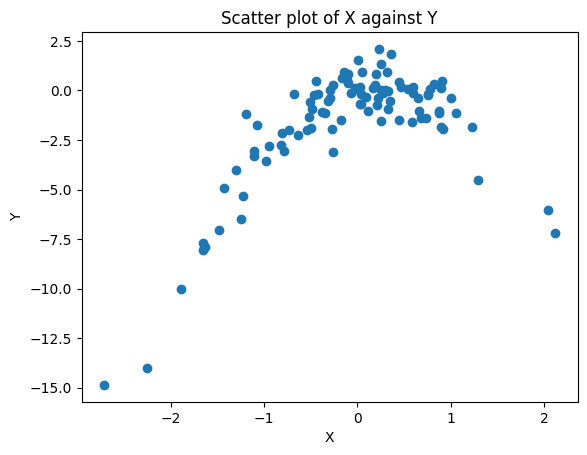

In [16]:
#
#
import matplotlib.pyplot as plt


plt.scatter(x=x, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X against Y')
plt.show()


Your answer:

~~~
Please write your answer in full sentences.

qualitative relationship between X and Y, with Y increasing as X increases.

~~~

(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

i.   $Y = \beta_0 + \beta_1X + \epsilon$
ii.  $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$
iii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$
iv.  $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$.

Note you may find it helpful to use the `data.frame()` function
to create a single data set containing both $X$ and $Y$ .


Your code:

In [19]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


degrees = [1, 2, 3, 4]
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept = False))
    scores = cross_val_score(model, sm.add_constant(x), y, cv=x.shape[0], scoring='neg_mean_squared_error')
    print(f'LOOCV error for degree {degree}: {-scores.mean()}')


LOOCV error for degree 1: 6.633029839181981
LOOCV error for degree 2: 1.1229368563419684
LOOCV error for degree 3: 1.3017965489358856
LOOCV error for degree 4: 1.3323942694179323



(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

Your code:

In [20]:
#
#
degrees = [1, 2, 3, 4]
rng = np.random.default_rng(2)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
# For each degree, fit the model and compute the LOOCV error
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept = False))
    scores = cross_val_score(model, sm.add_constant(x), y, cv=x.shape[0], scoring='neg_mean_squared_error')
    print(f'LOOCV error for degree {degree}: {-scores.mean()}')

LOOCV error for degree 1: 7.560603694358577
LOOCV error for degree 2: 0.9819364366719353
LOOCV error for degree 3: 0.9682355765918602
LOOCV error for degree 4: 0.9659585554875686


Your answer:

~~~
Please write your answer in full sentences.

no because the random seed is different, the results are different.
~~~

(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

Your code:

Your answer:

~~~
Please write your answer in full sentences.

dergee 4 polynomial had the smallest LOOCV error, which is not what I expected because the true relationship between X and Y was quadratic, not quartic.

~~~


(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?


Your code:

In [21]:
#
#
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4,'x5':x**5, 'y':y})

X_ = df.loc[:, df.columns != 'y']
X_ = sm.add_constant(X_, prepend=True)
y_ = df['y']

model = sm.OLS(y_, X_)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     151.3
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           2.34e-43
Time:                        18:14:27   Log-Likelihood:                -136.64
No. Observations:                 100   AIC:                             285.3
Df Residuals:                      94   BIC:                             300.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.144      0.105      0.9

Your answer:

~~~
Please write your answer in full sentences.

yes, the results agree with the conclusions drawn based on the cross-validation results.

~~~

### Default 1

In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

(a) Fit a logistic regression model that uses income and balance to predict default.

Your code:

In [28]:
#
#
#load the Default dataset from the ISLR package
dataset = sm.datasets.get_rdataset('Default', 'ISLR')
Default = dataset.data
Default.head()



,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [30]:
default_df=dataset.data
# Rationalise types
default_df = pd.get_dummies(default_df, dtype=np.float64).drop(['default_No', 'student_No'], axis=1)

display(default_df.head())

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0.0,0.0
1,817.180407,12106.134700,0.0,1.0
2,1073.549164,31767.138947,0.0,0.0
3,529.250605,35704.493935,0.0,0.0
4,785.655883,38463.495879,0.0,0.0


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from IPython.display import display, HTML
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
from scipy import stats

def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)


(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.





ii. Fit a multiple logistic regression model using only the training observations.




iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.



iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.





(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.


Your code:

In [40]:
#
#
for s in range(1,4):
    display(HTML('<h3>Random seed = {}</h3>'.format(s)))
    # Create index for 50% holdout set
    np.random.seed(s)
    train = np.random.rand(len(default_df)) < 0.5
    
    response   = 'default_Yes'
    predictors = ['income', 'balance']
    
    X_train = np.array(default_df[train][predictors])
    X_test  = np.array(default_df[~train][predictors])
    y_train = np.array(default_df[train][response])
    y_test  = np.array(default_df[~train][response])
    
    # Logistic regression
    logit       = LogisticRegression()
    model_logit = logit.fit(X_train, y_train)
    
    # Predict
    y_pred = model_logit.predict(X_test)
    
    # Analysis
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    
    total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
    print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,4826,20,4846
y=1,111,53,164
Total,4937,73,


total_error_rate: 2.6148%


,y_pred=0,y_pred=1,Total
,,,
y=0,4672,20,4692
y=1,125,51,176
Total,4797,71,


total_error_rate: 2.9786%


,y_pred=0,y_pred=1,Total
,,,
y=0,4749,25,4774
y=1,111,52,163
Total,4860,77,


total_error_rate: 2.7547%




(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.


Your code:

In [41]:
#
#
for s in range(1,4):

    # Create index for 50% holdout set
    np.random.seed(s)
    train = np.random.rand(len(default_df)) < 0.5
    
    response   = 'default_Yes'
    predictors = ['income', 'balance', 'student_Yes']
    
    X_train = np.array(default_df[train][predictors])
    X_test  = np.array(default_df[~train][predictors])
    y_train = np.array(default_df[train][response])
    y_test  = np.array(default_df[~train][response])
    
    # Logistic regression
    logit       = LogisticRegression()
    model_logit = logit.fit(X_train, y_train)
    
    # Predict
    y_pred = model_logit.predict(X_test)
    
    # Analysis
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    
    total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
    print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,4826,20,4846
y=1,111,53,164
Total,4937,73,


total_error_rate: 2.6148%


,y_pred=0,y_pred=1,Total
,,,
y=0,4674,18,4692
y=1,126,50,176
Total,4800,68,


total_error_rate: 2.9581%


,y_pred=0,y_pred=1,Total
,,,
y=0,4747,27,4774
y=1,111,52,163
Total,4858,79,


total_error_rate: 2.7952%


Your answer:

~~~
Please write your answer in full sentences.
It is not clear whether including a dummy variable for student leads to a reduction in the test error rate.

~~~

### Default 2

We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for the
standard errors of the income and balance logistic regression coefficients
in two different ways: (1) using the bootstrap, and (2) using the
standard formula for computing the standard errors in the sm.GLM()
function. Do not forget to set a random seed before beginning your
analysis.

(a) Using the `summarize()` and `sm.GLM()` functions, determine the
estimated standard errors for the coefficients associated with
income and balance in a multiple logistic regression model that
uses both predictors.
Your code:

In [55]:
import statsmodels.api as sm
import pandas as pd
import numpy as np


response = 'default_Yes' 
predictors = ['income', 'balance']  


X_all = sm.add_constant(default_df[predictors])
y_all = default_df[response]

## Logistic regression
model_logit = sm.Logit(y_all, X_all).fit(disp=False)  # Corrected to use sm.Logit

# Summary
print(model_logit.summary())


statsmodels_est = pd.DataFrame({'coef_sm': model_logit.params, 'SE_sm': model_logit.bse})
display(statsmodels_est)


                           Logit Regression Results                           
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.4594
Time:                        18:31:45   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.0

,coef_sm,SE_sm
const,-11.540468,0.434772
income,0.000021,0.000005
balance,0.005647,0.000227




(b) Write a function, `boot_fn()`, that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

Your code:

In [58]:
#
#



def boot_fn(df, index):
    response = 'default_Yes'
    predictors = ['income', 'balance']
    
    X = sm.add_constant(df.loc[index, predictors])
    y = df.loc[index, response]
       
    model_logit = sm.Logit(y, X).fit(disp=False)  
    return model_logit.params



(c) Following the bootstrap example in the lab, use your `boot_fn()`
function to estimate the standard errors of the logistic regression
coefficients for income and balance.


Your code:

In [60]:
#
#
def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

def standard_deviation(X):
    """Compute deviation error for jth element in matrix X
    equivalent to np.std(X, axis=0)"""
    X_bar = np.mean(X, axis=0)
    SE = np.sqrt((np.sum(np.square(X - X_bar), axis=0)) / (len(X)))
    return SE

B = 100
coef_preds    = boot(boot_fn, default_df, samples=B)
coef_pred     = np.mean(coef_preds, axis=0)
standard_errs = standard_deviation(coef_preds)

bootstrap_est = pd.DataFrame({'coef_boot': coef_pred, 'SE_boot': standard_errs})
display(bootstrap_est)

,coef_boot,SE_boot
0,-11.589509,0.401671
1,0.000021,0.000004
2,0.005676,0.000230




(d) Comment on the estimated standard errors obtained using the `sm.GLM()` function and using the bootstrap.

Your answer:

~~~
Please write your answer in full sentences.

the standard errors obtained using the `sm.GLM()` function and using the bootstrap are very close to each other.
~~~

### Boston housing data set

We will now consider the Boston housing data set, from the ISLR library.

In [76]:
Boston = load_data("Boston")

boston_df = boston

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


(a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate $\hat{\mu}$.

Your code:

In [65]:
#
#

Boston['medv'].mean()

22.532806324110677


(b) Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.
Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

Your code:

In [66]:
#
#
Boston['medv'].std()/len(Boston['medv'])**0.5

0.4088611474975351




(c) Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?

Your code:

In [72]:

# Compute standard error of the mean with the bootstrap approach

def mean_boot(df, idx):
    Z = np.array(df.loc[idx])
    return np.mean(Z)

def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

B = 10000
mean_boot  = boot(mean_boot, Boston['medv'], samples=B)
SE_pred    = np.std(mean_boot) 

print('SE: ' + str(SE_pred))

SE: 0.40992369991782823


Your answer:

~~~
Please write your answer in full sentences.
With B increases, the standard error of with bootstrap is very close to the standard error with the formula.

~~~

(d) Based on your bootstrap estimate from (c), provide a 95 % confidence
interval for the mean of medv. Compare it to the results
obtained by using `Boston['medv'].std()` and the two standard
error rule (3.9).
Hint: You can approximate a 95% confidence interval using the formula $[\hat{\mu} − 2SE(\hat{\mu}), \hat{\mu} + 2SE(\hat{\mu})]$.

Your code:

In [77]:
#
#

mu_hat   = np.mean(boston_df['medv'])
conf_low = mu_hat - (2*SE_pred)
conf_hi  = mu_hat + (2*SE_pred)

pd.Series({'mu': mu_hat, 
           'SE': SE_pred,
           '[0.025': conf_low,
           '0.975]': conf_hi})

mu        22.532806
SE         0.409924
[0.025    21.712959
0.975]    23.352654
dtype: float64




(e) Based on this data set, provide an estimate, $\hat{\mu}_{med}$, for the median value of medv in the population.

Your code:

In [78]:
#
#
median_hat = np.median(boston_df['medv'])
print('median: ' + str(median_hat))

median: 21.2




(f) We now would like to estimate the standard error of $\hat{\mu}_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

Your code:

In [82]:
#
#


def median_boot(data, idx):
    Z = data.iloc[idx]  

def boot_idx(n):
    """Return index for bootstrap sample of size n."""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data, samples):
    """Perform bootstrap for B number of samples."""
    results = []
    for _ in range(samples):
        idx = boot_idx(len(data))  # Generate bootstrap sample indices
        Z = fn(data, idx)  # Calculate statistic (median) for the bootstrap sample
        results.append(Z)
    return np.array(results)
B = 10000

boot_obs = boot(median_boot, boston_df['medv'], samples=B)
SE_pred = np.std(boot_obs)

print('SE:', SE_pred)

SE: 0.3769994081891903


Your answer:

~~~
Please write your answer in full sentences.

The standard error of  median value of medv is 0.38,wihch is very close to the standard error of the median with the bootstrap.
~~~



(g) Based on this data set, provide an estimate for the tenth percentile
of medv in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$.
(You can use the `np.percentile()` function.)

Your code:

In [83]:
#
#
tenth_percentile = np.percentile(boston_df['medv'], 10)
print('tenth_percentile: ' + str(tenth_percentile))

tenth_percentile: 12.75



(h) Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.

Your code:

In [84]:
#
#

# Compute standard error of the tenth percentile with the bootstrap approach

def tenth_percentile(df, idx):
    Z = np.array(df.loc[idx])
    return np.percentile(Z, 10)

def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

B = 10000
boot_obs   = boot(tenth_percentile, boston_df['medv'], samples=B)
SE_pred    = np.std(boot_obs) 

print('SE: ' + str(SE_pred))

SE: 0.5014116410445613


Your answer:

~~~
Please write your answer in full sentences.

The standard error of the tenth percentile of medv with bootstrap is 0.501,which is simiilar to that obtained by the formula.
~~~

## Additional Material

### Cross Validation for Predictive Modeling Platforms in Python

#### scikit-learn

Using platforms like scikit-learn is helpful for things such as cross validation.
There are variants of CV implemented to be used off the shelf
https://scikit-learn.org/stable/modules/cross_validation.html

There are many metrics you can choose from
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [36]:
ames_raw_comp=ames_raw.loc[:,["SalePrice","Gr Liv Area","Lot Area","Total Bsmt SF"]].dropna()
X=ames_raw_comp.loc[:,["Gr Liv Area","Lot Area","Total Bsmt SF"]]
y=ames_raw_comp.loc[:,"SalePrice"]
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import svm
from sklearn.linear_model import LinearRegression
clf =  LinearRegression()
## One metric
scores = cross_val_score(clf, X, y, cv=5,scoring="r2")
## Multiple metrics
scoring = ['r2', 'max_error']
scores = cross_validate(clf, X, y, scoring=scoring)

#### PySpark

[Apache Spark](https://spark.apache.org/docs/3.1.3/api/python/index.html) is a popular large data handling platform.  Over the years, they built Machine Learning capabilities in MLlib.

In [37]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
import tempfile

In [38]:
spark = SparkSession.builder.appName("CV_test").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/11 21:04:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [39]:
dataset = spark.createDataFrame(
    [(Vectors.dense([0.0]), 0.0),
     (Vectors.dense([0.4]), 1.0),
     (Vectors.dense([0.5]), 0.0),
     (Vectors.dense([0.6]), 1.0),
     (Vectors.dense([1.0]), 1.0)] * 10,
    ["features", "label"])
lr = LogisticRegression()
grid = ParamGridBuilder().addGrid(lr.maxIter, [0, 1]).build()
evaluator = BinaryClassificationEvaluator()
cv = CrossValidator(estimator=lr, estimatorParamMaps=grid, evaluator=evaluator,
    parallelism=2)
cvModel = cv.fit(dataset)
cvModel.getNumFolds()
cvModel.avgMetrics[0]
evaluator.evaluate(cvModel.transform(dataset))

24/01/11 21:04:28 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


0.8333333333333333

In [40]:
spark.stop()

#### Resampling  using h2o

On H2O cross validation is embedded in the function calling so you don't need to worry about learning a new wrapper on top of your estimator.
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html

In [41]:
#pip install requests
#pip install tabulate
#pip uninstall h2o
#pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
# load packages and data
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

##### Starting H2O

To use H2O you need to instantiate it.

In [42]:
# nthreads specifies number of threads. -1 means use all the CPU cores.
# max_mem_size specifies the maximum amount of RAM to use.
localH2O= h2o.init(nthreads = -1, max_mem_size="4g")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_361"; Java(TM) SE Runtime Environment (build 1.8.0_361-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from /opt/homebrew/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/r8/_9frrgnx0rq_kt6_r0yvgwlc0000gn/T/tmpbl2r93zb
  JVM stdout: /var/folders/r8/_9frrgnx0rq_kt6_r0yvgwlc0000gn/T/tmpbl2r93zb/h2o_masanaoyajima_started_from_python.out
  JVM stderr: /var/folders/r8/_9frrgnx0rq_kt6_r0yvgwlc0000gn/T/tmpbl2r93zb/h2o_masanaoyajima_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_masanaoyajima_gs7xs1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.529 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


##### CV with  H2O

In [43]:
# Import the prostate dataset
prostate = h2o.import_file("http://s3.amazonaws.com/h2o-public-test-data/smalldata/prostate/prostate.csv.zip")

# Set the predictor names and the response column name
response = "CAPSULE"
predictors = prostate.names[3:8]

# Convert the response column to a factor
prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()

# Train a GBM model setting nfolds to 5
prostate_gbm = H2OGeneralizedLinearEstimator(nfolds = 5, seed = 1)
prostate_gbm.train(x=predictors, y=response, training_frame=prostate)

# AUC of cross-validated holdout predictions
prostate_gbm.auc(xval=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


0.7790697716207187

##### Shut down H2O

In [44]:
h2o.cluster().shutdown(prompt =False)

H2O session _sid_8dc7 closed.
